# EXPLORATION 3 : 카메라 스티커앱 만들기 첫걸음

## 준비한 데이터
- 얼굴이 나온 사진들
- 왕관, 고양이 수염 스티커

# 1. 왕관 적용해보기

## - 이미지 확인

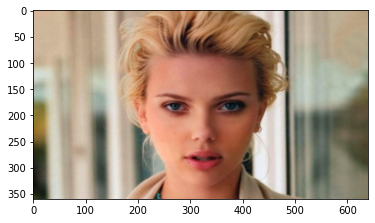

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/widow.png'
img_bgr = cv2.imread(my_image_path)                   #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))             # 640x360의 크기로 Resize
img_show = img_bgr.copy()                             #- 출력용 이미지 별도 보관
img_bgr_orig = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # plt.imshow 이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

## - detector를 이용해서 얼굴의 bounding box를 추출

rectangles[[(216, 118) (439, 341)]]


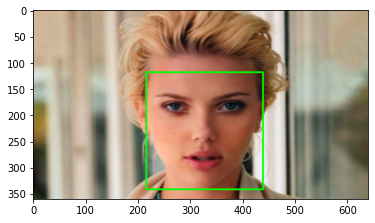

In [2]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## - 랜드마크 모델 불러오기

In [3]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


## - 랜드마크 출력해보기

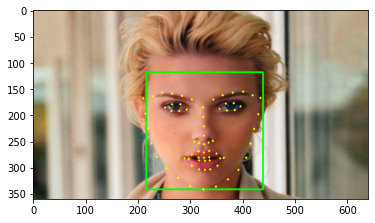

In [4]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## - 좌표 확인

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(326, 239)
(x,y) : (326,127)
(w,h) : (224,224)


## - 코의 중심점이 (326, 239) 로 나오므로 이것을 이용해서 스티커 위치 선정

In [6]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 왕관 리사이즈
print (img_sticker.shape)

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정 (이미지 시작점은 top-left 좌표)
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리
img_sticker = img_sticker[-refined_y:] 
print (img_sticker.shape)
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(224, 224, 3)
(x,y) : (214,-97)
(127, 224, 3)
(x,y) : (214,0)


## - 스티커 적용하기

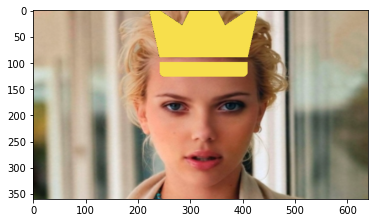

In [7]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## - 불투명도 조절

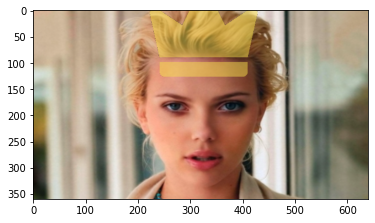

In [8]:
sticker_area = img_bgr_orig[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 2. 프로젝트 : 고양이 수염 적용해보기

## - 이미지 확인

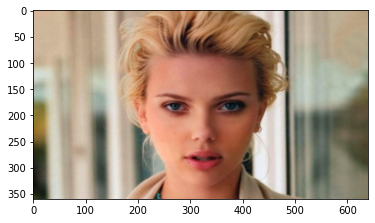

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/widow.png'
img_bgr = cv2.imread(my_image_path)                   #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))             # 640x360의 크기로 Resize
img_show = img_bgr.copy()                             #- 출력용 이미지 별도 보관
img_bgr_orig = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # plt.imshow 이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

## - detector를 이용해서 얼굴의 bounding box를 추출

rectangles[[(216, 118) (439, 341)]]


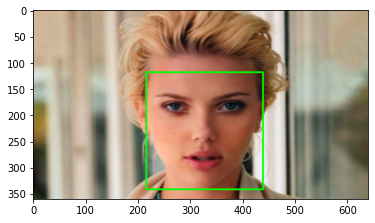

In [10]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## - 랜드마크 모델 불러오기

In [11]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


## - 랜드마크 출력해보기

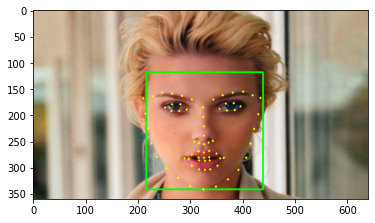

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## - 좌표 확인

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(326, 239)
(x,y) : (326,239)
(w,h) : (224,224)


## - 코의 중심점이 (326, 239) 로 나오므로 이것을 이용해서 스티커 위치 선정

In [14]:
# 스티커 이미지 Read
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'  
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 리사이즈
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape)

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정 (이미지 시작점은 top-left 좌표)
refined_x = x - img_sticker.shape[1] // 2  # left
refined_y = y + img_sticker.shape[0] // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    refined_y = 0
    print (f'(x,y) : {refined_x, refined_y}')
    
# sticker 영역 구하기
sticker_area = img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]


(224, 224, 3)
(x,y) : (214,351)


## - 스티커 적용하기

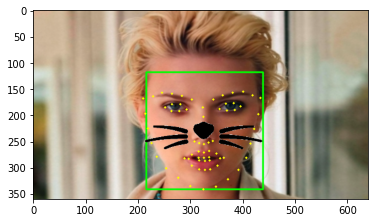

In [15]:
# 원래 이미지의 스티커 영역에 스티커 붙히기
img_show[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) # np.where(조건, 맞을때 실행, 아닐때 실행)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

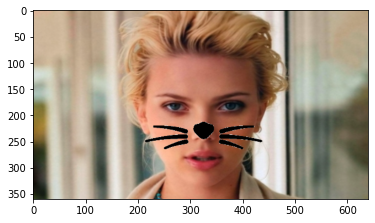

In [16]:
sticker_area = img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## - 불투명도 조절하기

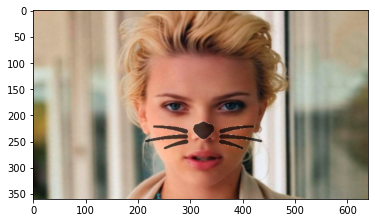

In [17]:
sticker_area = img_bgr_orig[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y-img_sticker.shape[0]:refined_y, refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.3, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.7, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 3. 고양이도 얼굴인식이 가능할까? 

## - 이미지 확인

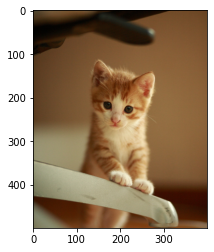

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cheese.png'
img_bgr = cv2.imread(my_image_path)                   #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (400, 500))             
img_show = img_bgr.copy()                             #- 출력용 이미지 별도 보관
img_bgr_orig = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # plt.imshow 이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

## - detector를 이용해서 얼굴의 bounding box를 추출

rectangles[]


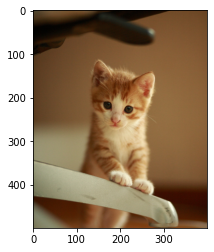

In [19]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 고양이는 얼굴인식이 불가능...

# 4. 다양한 각도에서 얼굴인식

## - 이미지 확인

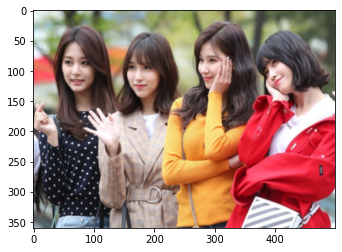

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/twice.png'
img_bgr = cv2.imread(my_image_path)                   #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (500, 360))             # 640x360의 크기로 Resize
img_show = img_bgr.copy()                             #- 출력용 이미지 별도 보관
img_bgr_orig = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # plt.imshow 이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()


## - detector를 이용해서 얼굴의 bounding box를 추출

rectangles[[(262, 67) (314, 118)], [(38, 73) (100, 135)], [(149, 80) (211, 142)]]


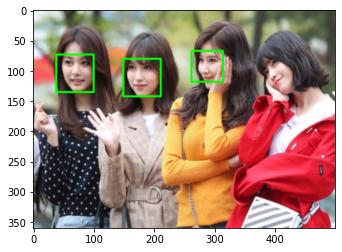

In [21]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 옆모습도 얼굴인식이 되지만 너무 과하게 옆에서 찍은 사진은 얼굴인식이 불가능하다.

# 느낀점
- 움직이지 않는 이미지에서 얼굴을 인식하고 랜드마크를 이용하여 스티커를 적용해 보았는데 그동안 경험했던 카메라 어플들은 움직이는 영상에 스티커를 붙이는 수준이므로 그 어플들이 얼마나 발전된 기술인건지 수준을 느끼게 되었다.
- 어떤 원리로 카메라 앱에서 스티커를 붙일 수 있는지 매커니즘에 대해 알게 되었고 cv2 라이브러리의 사용법도 어느정도 알게되었다.
- 좌표가 일반적으로 생각하는 좌표계와 달라서 처음에 많이 헷갈렸는데 차근차근 보다보니 이해할 수 있게되었고 다양한 사진에 다양하게 적용할 수 있는 좌표모듈을 개발하는게 중요하다는 생각이 들었다.
- 얼굴이 기울어 졌을때 스티커도 같이 기울여 붙이는 방법도 고안해봐야겠다.